In [11]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import pandas as pd
from datetime import datetime
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt 
from statsmodels.tsa.api import VAR
from scipy.stats import pearsonr
import os

In [2]:
files = os.listdir('ssw_events_saved/')[-15:]

In [3]:
# Load all data into one dataframe
df_all = pd.DataFrame()
for file in files:
    df = pd.read_csv("ssw_events_saved/" + file)
    df = df.reset_index()
    df = df.sort_values(by='dates', ascending=True)
    df_all = pd.concat([df,df_all])

df_all = df_all.sort_values(by='dates', ascending=True)
df_all['index_'] = range(1, len(df_all) + 1)

# # load your time histories into a Pandas DataFrame
# df = pd.read_csv("ssw_events_saved/2009-01-24_ssw.csv")
df_all = df_all.drop(columns=['dates', 'index','SSW_','SSW_flag','temperature_pct_change'])

In [4]:
df_all

,wind_eastward_mean,wind_eastward_mean_selection,temperature_mean_selection,wind_eastward_mean_cos,temperate_mean_cos,index_
0,28.414255,30.135976,204.543238,14.207127,102.271619,1
1,26.614167,36.368349,210.361044,13.307083,105.180522,2
2,26.975674,34.671573,210.486294,13.487837,105.243147,3
3,27.627846,39.825435,208.443535,13.813923,104.221767,4
4,28.451653,45.843643,204.081435,14.225827,102.040717,5
...,...,...,...,...,...,...
36,13.896140,38.462374,207.197588,6.948070,103.598794,604
37,14.519023,41.404893,208.791868,7.259512,104.395934,605
38,14.869889,37.994384,210.189832,7.434945,105.094916,606
39,14.810950,36.276005,212.601860,7.405475,106.300930,607


In [5]:
df = df_all
fig = go.Figure()

fig.add_trace(go.Scatter(x=df['index_'], y=df['wind_eastward_mean_cos'], name='wind_eastward_mean_selection', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=df['index_'], y=df['temperature_mean_selection'], name='Temperature Selection Mean', line=dict(color='orange'), yaxis='y2'))

# Set layout
fig.update_layout(
    yaxis=dict(
        range=[-50, 80],
        title='wind_eastward_mean_cos'
    )
    ,yaxis2=dict(
        range=[190, 250],
        title='Temperature Selection Mean',
        side='right',
        overlaying='y'
    )
    ,xaxis=dict(title='Dates'),
    title=f'ZMZW at 60◦ N latitude and Temperature, 1970 t0 2016',
    legend=dict(orientation="h", y=1.2, x=0.5))

# Show the plot
fig.show()

In [6]:
avgs = df.mean()
devs = df.std()

for col in ['temperature_mean_selection', 'wind_eastward_mean_cos']:
    df[col] = (df[col] - avgs.loc[col]) / devs.loc[col]

In [7]:
df = df_all
fig = go.Figure()

fig.add_trace(go.Scatter(x=df['index_'], y=df['wind_eastward_mean_cos'], name='wind_eastward_mean_selection', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=df['index_'], y=df['temperature_mean_selection'], name='Temperature Selection Mean', line=dict(color='orange'), yaxis='y2'))

# Set layout
fig.update_layout(
    yaxis=dict(
        range=[-5, 5],
        title='wind_eastward_mean_cos'
    )
    ,yaxis2=dict(
        range=[-5, 5],
        title='Temperature Selection Mean',
        side='right',
        overlaying='y'
    )
    ,xaxis=dict(title='Dates'),
    title=f'ZMZW at 60◦ N latitude and Temperature, 1970 t0 2016',
    legend=dict(orientation="h", y=1.2, x=0.5))

# Show the plot
fig.show()

In [8]:
df = df.diff().dropna()
df['index_'] = range(1, len(df) + 1)


In [9]:
df

,wind_eastward_mean,wind_eastward_mean_selection,temperature_mean_selection,wind_eastward_mean_cos,temperate_mean_cos,index_
1,-1.800088,6.232373,0.364535,-0.150479,2.908903,1
2,0.361507,-1.696776,0.007848,0.030220,0.062625,2
3,0.652172,5.153862,-0.127996,0.054519,-1.021380,3
4,0.823808,6.018208,-0.273323,0.068867,-2.181050,4
5,-0.412696,1.607935,0.117943,-0.034500,0.941157,5
...,...,...,...,...,...,...
36,0.861386,5.857433,0.120649,0.072008,0.962751,603
37,0.622883,2.942519,0.099895,0.052070,0.797140,604
38,0.350866,-3.410509,0.087594,0.029331,0.698982,605
39,-0.058939,-1.718379,0.151134,-0.004927,1.206014,606


In [10]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df['index_'], y=df['wind_eastward_mean_cos'], name='wind_eastward_mean_selection', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=df['index_'], y=df['temperature_mean_selection'], name='Temperature Selection Mean', line=dict(color='orange'), yaxis='y2'))

# Set layout
fig.update_layout(
    yaxis=dict(
        range=[-5, 5],
        title='wind_eastward_mean_cos'
    )
    ,yaxis2=dict(
        range=[-5, 5],
        title='Temperature Selection Mean',
        side='right',
        overlaying='y'
    )
    ,xaxis=dict(title='Dates'),
    title=f'ZMZW at 60◦ N latitude and Temperature, 1970 t0 2016',
    legend=dict(orientation="h", y=1.2, x=0.5))

# Show the plot
fig.show()

/Users/joaojesus/opt/anaconda3/envs/main_fyp_env/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



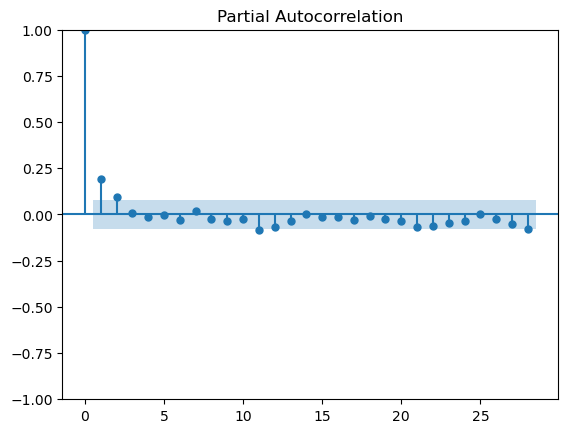

In [12]:
plot_pacf(df['wind_eastward_mean_cos'])
plt.show()

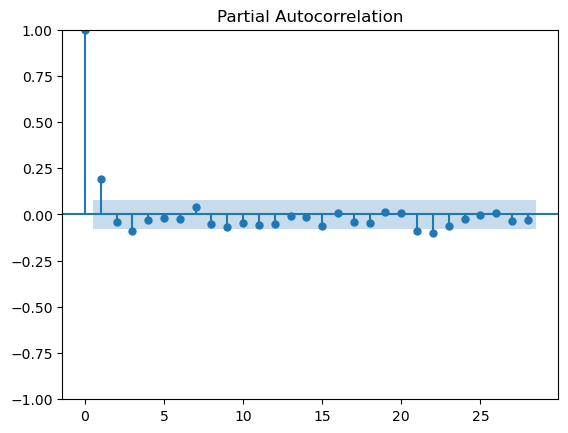

In [13]:
plot_pacf(df['temperature_mean_selection'])
plt.show()

In [16]:
for lag in range(1, 20):
    temp_series = df['temperature_mean_selection'].iloc[lag:]
    wind_series = df['wind_eastward_mean_cos'].iloc[:-lag]
    print('Lag: %s'%lag)
    print(pearsonr(temp_series, wind_series))
    print('------')

Lag: 1
PearsonRResult(statistic=-0.031085771619664544, pvalue=0.4449595140339777)
------
Lag: 2
PearsonRResult(statistic=0.06701388114747552, pvalue=0.09960611250819944)
------
Lag: 3
PearsonRResult(statistic=0.05942386578274579, pvalue=0.14465063506270587)
------
Lag: 4
PearsonRResult(statistic=-0.012334148299775829, pvalue=0.762453025024629)
------
Lag: 5
PearsonRResult(statistic=-0.004388902153149519, pvalue=0.9144229138130069)
------
Lag: 6
PearsonRResult(statistic=0.0029315682302280695, pvalue=0.9428256841241003)
------
Lag: 7
PearsonRResult(statistic=0.0031883801039693654, pvalue=0.9378786610135926)
------
Lag: 8
PearsonRResult(statistic=0.04768725616570336, pvalue=0.243879054650655)
------
Lag: 9
PearsonRResult(statistic=0.029632646041113236, pvalue=0.4695075475185519)
------
Lag: 10
PearsonRResult(statistic=0.0559300282190999, pvalue=0.17232366601159224)
------
Lag: 11
PearsonRResult(statistic=0.10794699355838822, pvalue=0.008351955645706472)
------
Lag: 12
PearsonRResult(stati

In [17]:
df = df[['temperature_mean_selection', 'wind_eastward_mean_cos']]
model = VAR(df)
model_fit = model.fit(maxlags=11)
model_fit.summary()

/Users/joaojesus/opt/anaconda3/envs/main_fyp_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 03, Apr, 2023
Time:                     16:57:30
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -4.53143
Nobs:                     596.000    HQIC:                  -4.73833
Log likelihood:          -194.034    FPE:                 0.00767187
AIC:                     -4.87027    Det(Omega_mle):      0.00711234
--------------------------------------------------------------------
Results for equation temperature_mean_selection
                                    coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------------------
const                                  0.000358         0.015250            0.023           0.981
L1.temperature_mean_selection          0.240209         0.052087     